### Current State & Developments (Top 3 Countries by Avg ARPI_D14)

- US:
  - Avg ARPI_D14: 0.4100
  - Total Installs: 18023
  - Total Ad Spend: $8540.47
  - Avg ROAS_D14: 0.92
  - Avg CPI: 0.4544

- GB:
  - Avg ARPI_D14: 0.1901
  - Total Installs: 3112
  - Total Ad Spend: $804.80
  - Avg ROAS_D14: 0.76
  - Avg CPI: 0.2496

- DE:
  - Avg ARPI_D14: 0.1460
  - Total Installs: 6088
  - Total Ad Spend: $1420.31
  - Avg ROAS_D14: 0.66
  - Avg CPI: 0.2217



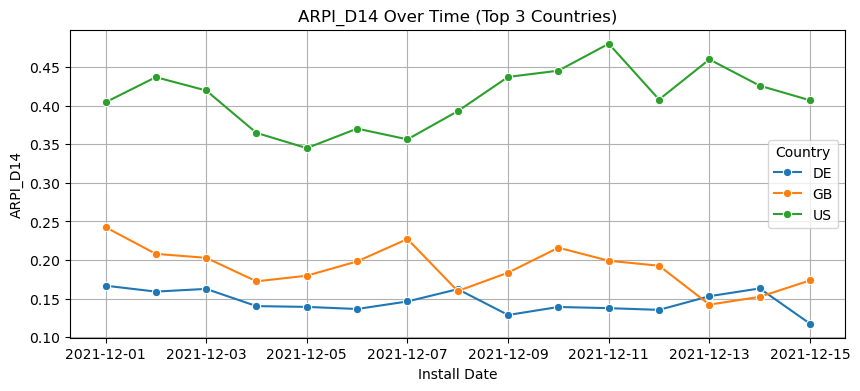

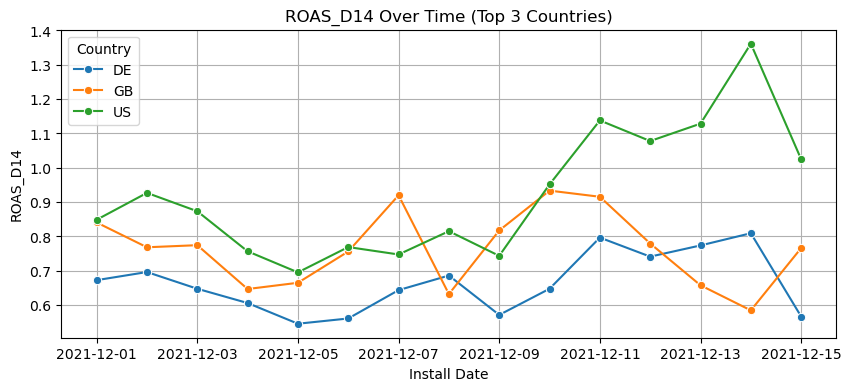

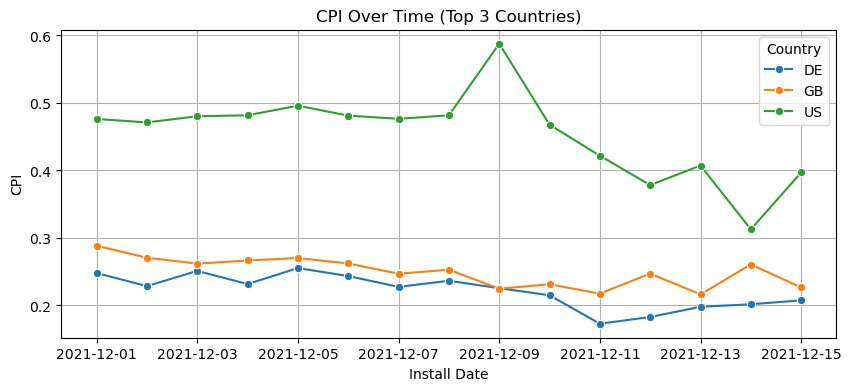

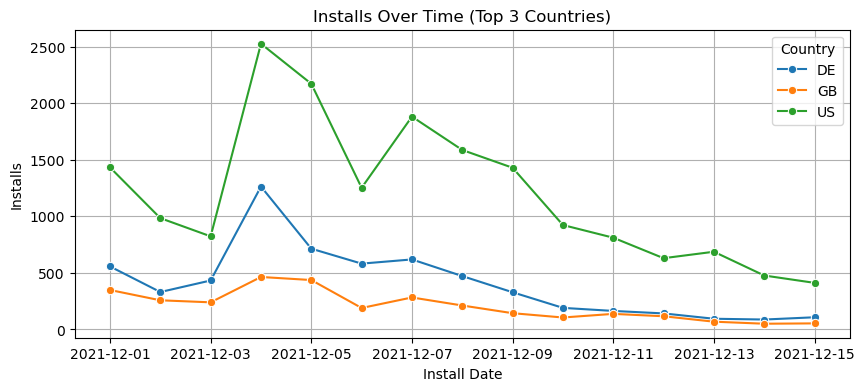

### Recommendations for Next Steps

- US:
  - ROAS_D14 is moderate/low: Optimize campaigns for better targeting or reduce CPI.
  - Monitor ARPI_D14 trends and test new creatives or channels to improve monetization.
  - Analyze user cohorts for retention and upsell opportunities.

- GB:
  - ROAS_D14 is moderate/low: Optimize campaigns for better targeting or reduce CPI.
  - Monitor ARPI_D14 trends and test new creatives or channels to improve monetization.
  - Analyze user cohorts for retention and upsell opportunities.

- DE:
  - ROAS_D14 is moderate/low: Optimize campaigns for better targeting or reduce CPI.
  - Monitor ARPI_D14 trends and test new creatives or channels to improve monetization.
  - Analyze user cohorts for retention and upsell opportunities.



In [2]:
# Fruit Battle: Top 3 Countries by ARPI_D14 Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and filter data
df = pd.read_csv('summary.csv', parse_dates=['install_date'])
fb = df[(df['client'] == 'fruit_battle') & (df['install_date'].between('2021-12-01', '2021-12-15'))]

# Identify top 3 countries by average ARPI_D14
top3 = fb.groupby('country')['arpi_d14'].mean().nlargest(3).index
fb_top3 = fb[fb['country'].isin(top3)]

# Summary bullet points
print("### Current State & Developments (Top 3 Countries by Avg ARPI_D14)\n")
for c in top3:
    sub = fb_top3[fb_top3['country'] == c]
    print(f"- {c}:")
    print(f"  - Avg ARPI_D14: {sub['arpi_d14'].mean():.4f}")
    print(f"  - Total Installs: {sub['installs'].sum()}")
    print(f"  - Total Ad Spend: ${sub['ad_spend'].sum():.2f}")
    print(f"  - Avg ROAS_D14: {sub['roas_d14'].mean():.2f}")
    print(f"  - Avg CPI: {sub['cpi'].mean():.4f}\n")

# Visualizations
metrics = ['arpi_d14', 'roas_d14', 'cpi', 'installs']
titles = ['ARPI_D14', 'ROAS_D14', 'CPI', 'Installs']
for m, t in zip(metrics, titles):
    plt.figure(figsize=(10,4))
    sns.lineplot(data=fb_top3, x='install_date', y=m, hue='country', marker='o')
    plt.title(f'{t} Over Time (Top 3 Countries)')
    plt.ylabel(t)
    plt.xlabel('Install Date')
    plt.legend(title='Country')
    plt.grid(True)
    plt.show()

# Recommendations
print("### Recommendations for Next Steps\n")
for c in top3:
    avg_roas = fb_top3[fb_top3['country'] == c]['roas_d14'].mean()
    print(f"- {c}:")
    if avg_roas > 1:
        print("  - ROAS_D14 is strong (>1): Consider increasing ad spend to scale acquisition.")
    else:
        print("  - ROAS_D14 is moderate/low: Optimize campaigns for better targeting or reduce CPI.")
    print("  - Monitor ARPI_D14 trends and test new creatives or channels to improve monetization.")
    print("  - Analyze user cohorts for retention and upsell opportunities.\n")